# Problem 9
Score each of the ranking functions on the data we provide using the BasicInvertedIndex for the full document collection. Use the default hyperparameters in the code. To better understand the performance of the system, you should collect the MAP and NDCG scores for each query. We want you to create one table and one plot using these scores

1. Table: Summarize the average performance for each ranker. You should have two rows (one for MAP and one for NDCG) and the columns should denote the rankers. The values should present the average score for that ranker using that particular evaluation metric.
2. Plot: Create two plots, one for MAP and one for NDCG. Plot these scores on the y-axis and the relevance function on the x-axis. Use a violin plot to provide the distribution of scores for each relevance function. Use different hues for each metric. We recommend using Seaborn to make this easy. In 2-3 sentences, describe what you see and how similar you think the relevance functions are in terms of performance.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pympler import asizeof
import pandas as pd
from document_preprocessor import RegexTokenizer
import pickle
import os

In [2]:
dataset_path = 'data/wikipedia_200k_dataset.jsonl.gz'
index_file = '__cache__/index_-1_Regex_BasicInvertedIndex.pkl'
raw_text_file = '__cache__/raw_text_-1.pkl'

tokenizer = RegexTokenizer(lowercase=True)
stopwords = set()
minimum_word_frequency = 0

print("Loading Basic Inverted Index and raw_text_dict from cache...")
with open(index_file, 'rb') as f:
    basic_index = pickle.load(f)
with open(raw_text_file, 'rb') as f:
    raw_text_dict = pickle.load(f)
print("Basic Inverted Index loaded successfully.")
print(f"Size of index: {asizeof.asizeof(basic_index) / (1024 * 1024):.2f} MB")

Loading Basic Inverted Index and raw_text_dict from cache...
Basic Inverted Index loaded successfully.
Size of index: 19522.20 MB


In [3]:
from ranker import (
    Ranker,
    RelevanceScorer,
    WordCountCosineSimilarity,
    TF_IDF,
    BM25,
    PivotedNormalization,
    DirichletLM,
    YourRanker,
    compute_term_stats
)

from relevance import run_relevance_tests, map_score, ndcg_score

In [4]:
rankers = {
    'WordCountCosineSimilarity': Ranker(
        index=basic_index,
        document_preprocessor=tokenizer,
        stopwords=stopwords,
        scorer=WordCountCosineSimilarity(index=basic_index),
        top_k=100
    ),
    'TF_IDF': Ranker(
        index=basic_index,
        document_preprocessor=tokenizer,
        stopwords=stopwords,
        scorer=TF_IDF(index=basic_index),
        top_k=100
    ),
    'BM25': Ranker(
        index=basic_index,
        document_preprocessor=tokenizer,
        stopwords=stopwords,
        scorer=BM25(index=basic_index),
        top_k=100
    ),
    'PivotedNormalization': Ranker(
        index=basic_index,
        document_preprocessor=tokenizer,
        stopwords=stopwords,
        scorer=PivotedNormalization(index=basic_index),
        top_k=100
    ),
    'DirichletLM': Ranker(
        index=basic_index,
        document_preprocessor=tokenizer,
        stopwords=stopwords,
        scorer=DirichletLM(index=basic_index),
        top_k=100
    ),
    'YourRanker': Ranker(
        index=basic_index,
        document_preprocessor=tokenizer,
        stopwords=stopwords,
        scorer=YourRanker(index=basic_index),
        top_k=100
    )
}

In [5]:
relevance_data_filename = 'data/relevance.test.csv'

In [6]:
results = {
    'WordCountCosineSimilarity': {'map': [], 'ndcg': []},
    'TF_IDF': {'map': [], 'ndcg': []},
    'BM25': {'map': [], 'ndcg': []},
    'PivotedNormalization': {'map': [], 'ndcg': []},
    'DirichletLM': {'map': [], 'ndcg': []},
    'YourRanker': {'map': [], 'ndcg': []}
}

for ranker_name, ranker in rankers.items():
    print(f"\nEvaluating ranking functions: {ranker_name}")
    scores = run_relevance_tests(relevance_data_filename, ranker)
    results[ranker_name]['map'] = scores['map_list']
    results[ranker_name]['ndcg'] = scores['ndcg_list']
    print(f"{ranker_name} mean MAP: {scores['map']:.4f}")
    print(f"{ranker_name} mean NDCG: {scores['ndcg']:.4f}")

Evaluating Queries:   0%|          | 0/37 [00:00<?, ?it/s]


Evaluating ranking functions: WordCountCosineSimilarity


Evaluating Queries:   0%|          | 0/37 [00:00<?, ?it/s]

WordCountCosineSimilarity mean MAP: 0.0670
WordCountCosineSimilarity mean NDCG: 0.1030

Evaluating ranking functions: TF_IDF


Evaluating Queries:   0%|          | 0/37 [00:00<?, ?it/s]

TF_IDF mean MAP: 0.0800
TF_IDF mean NDCG: 0.1943

Evaluating ranking functions: BM25


Evaluating Queries:   0%|          | 0/37 [00:00<?, ?it/s]

BM25 mean MAP: 0.0778
BM25 mean NDCG: 0.1153

Evaluating ranking functions: PivotedNormalization


Evaluating Queries:   0%|          | 0/37 [00:00<?, ?it/s]

PivotedNormalization mean MAP: 0.0549
PivotedNormalization mean NDCG: 0.0876

Evaluating ranking functions: DirichletLM


Evaluating Queries:   0%|          | 0/37 [00:00<?, ?it/s]

DirichletLM mean MAP: 0.0620
DirichletLM mean NDCG: 0.0601

Evaluating ranking functions: YourRanker


Evaluating Queries: 100%|██████████| 37/37 [00:47<00:00,  1.28s/it]

YourRanker mean MAP: 0.0067
YourRanker mean NDCG: 0.0034


In [7]:
summary_data = {
    'MAP': {ranker: round(sum(scores['map']) / len(scores['map']), 4) for ranker, scores in results.items()},
    'NDCG': {ranker: round(sum(scores['ndcg']) / len(scores['ndcg']), 4) for ranker, scores in results.items()}
}

summary_df = pd.DataFrame(summary_data)
print("Average performance table of ranking function: ")
print(summary_df)

Average performance table of ranking function: 
                              MAP    NDCG
WordCountCosineSimilarity  0.0670  0.1030
TF_IDF                     0.0800  0.1943
BM25                       0.0778  0.1153
PivotedNormalization       0.0549  0.0876
DirichletLM                0.0620  0.0601
YourRanker                 0.0067  0.0034


C:\Users\16979\AppData\Local\Temp\ipykernel_23764\2425468625.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Ranker', y='MAP', data=plot_df, inner='quartile', palette='Set2')


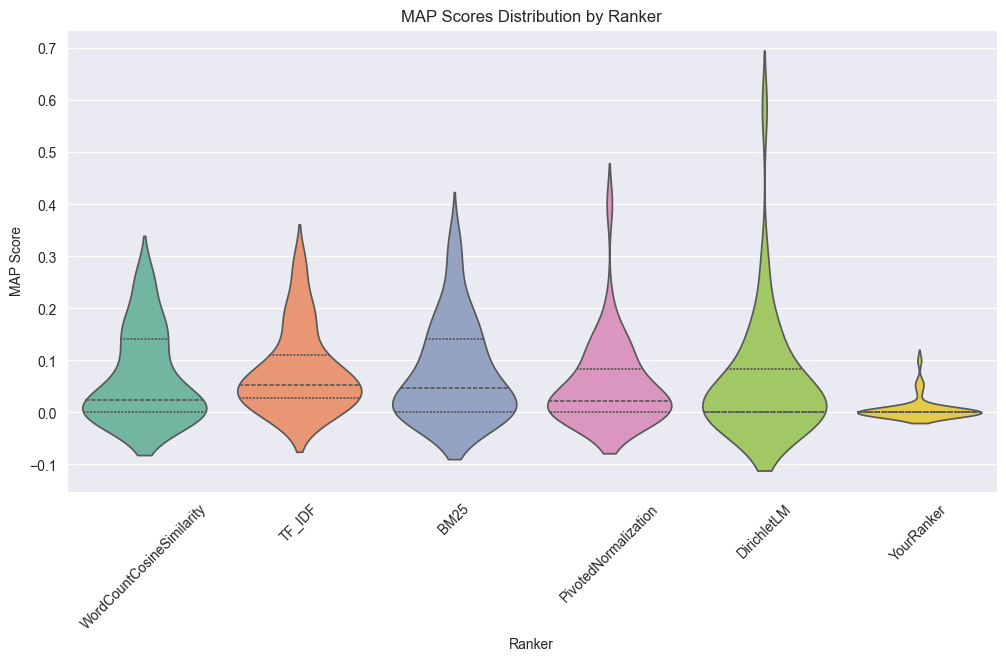

C:\Users\16979\AppData\Local\Temp\ipykernel_23764\2425468625.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Ranker', y='NDCG', data=plot_df, inner='quartile', palette='Set3')


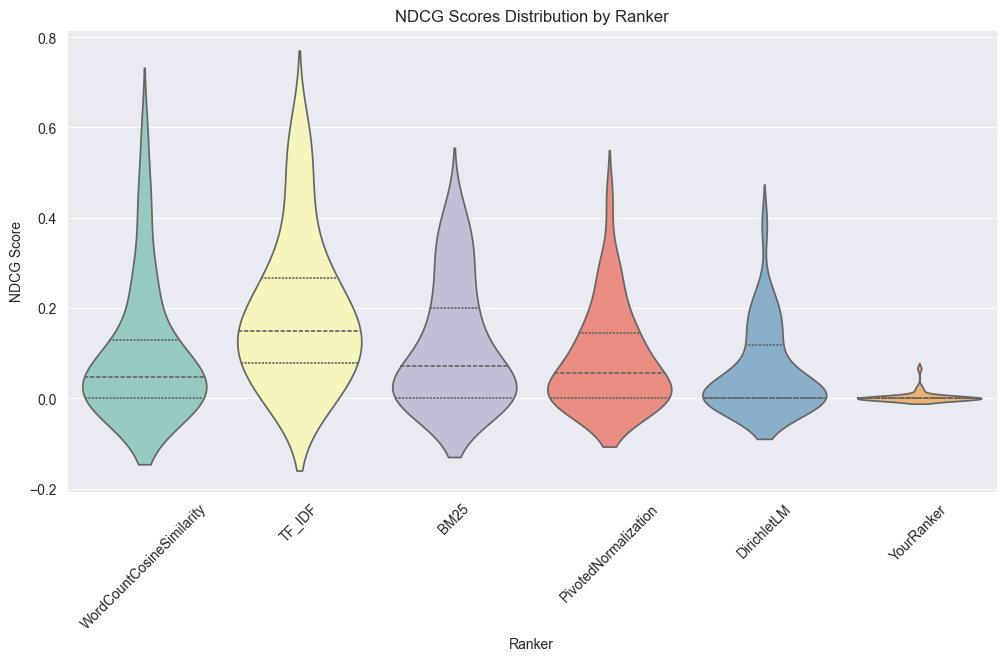

In [8]:
plot_data = []
for ranker, scores in results.items():
    for ap, ndcg in zip(scores['map'], scores['ndcg']):
        plot_data.append({'Ranker': ranker, 'MAP': ap, 'NDCG': ndcg})

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 6))
sns.violinplot(x='Ranker', y='MAP', data=plot_df, inner='quartile', palette='Set2')
plt.title('MAP Scores Distribution by Ranker')
plt.xlabel('Ranker')
plt.ylabel('MAP Score')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Ranker', y='NDCG', data=plot_df, inner='quartile', palette='Set3')
plt.title('NDCG Scores Distribution by Ranker')
plt.xlabel('Ranker')
plt.ylabel('NDCG Score')
plt.xticks(rotation=45)
plt.show()

# Conclusion
Based on the results, I observe that TF_IDF performs the best among all the ranking functions, with the highest MAP and NDCG scores. BM25 also performs relatively well, though slightly behind TF_IDF. WordCountCosineSimilarity and DirichletLM show moderate performance, while PivotedNormalization lags behind. However, YourRanker performs significantly worse than the others, with extremely low MAP and NDCG scores. This suggests that the different ranking functions vary significantly in performance, with TF_IDF and BM25 clearly outperforming the others, while YourRanker needs substantial improvements.